<a href="https://colab.research.google.com/github/arpits28/Sign_board_analyzer/blob/master/Sign_board_analyzer_50_epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishFnt.tgz"

--2021-01-01 10:31:31--  http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishFnt.tgz
Resolving www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)... 131.227.80.48
Connecting to www.ee.surrey.ac.uk (www.ee.surrey.ac.uk)|131.227.80.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49817950 (48M) [application/x-gzip]
Saving to: ‘EnglishFnt.tgz’

EnglishFnt.tgz      100%[===================>]  47.51M  15.7MB/s    in 3.0s    

2021-01-01 10:31:35 (15.7 MB/s) - ‘EnglishFnt.tgz’ saved [49817950/49817950]



In [2]:
!tar zxvf EnglishFnt.tgz

Streaming output truncated to the last 5000 lines.
English/Fnt/Sample043/img043-00095.png
English/Fnt/Sample043/img043-00096.png
English/Fnt/Sample043/img043-00097.png
English/Fnt/Sample043/img043-00098.png
English/Fnt/Sample043/img043-00099.png
English/Fnt/Sample043/img043-00100.png
English/Fnt/Sample043/img043-00101.png
English/Fnt/Sample043/img043-00102.png
English/Fnt/Sample043/img043-00103.png
English/Fnt/Sample043/img043-00104.png
English/Fnt/Sample043/img043-00105.png
English/Fnt/Sample043/img043-00106.png
English/Fnt/Sample043/img043-00108.png
English/Fnt/Sample043/img043-00109.png
English/Fnt/Sample043/img043-00110.png
English/Fnt/Sample043/img043-00111.png
English/Fnt/Sample043/img043-00112.png
English/Fnt/Sample043/img043-00113.png
English/Fnt/Sample043/img043-00114.png
English/Fnt/Sample043/img043-00115.png
English/Fnt/Sample043/img043-00116.png
English/Fnt/Sample043/img043-00117.png
English/Fnt/Sample043/img043-00118.png
English/Fnt/Sample043/img043-00119.png
English/Fnt/S

In [3]:
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pickle
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
!mkdir -p dataset

In [5]:
original_data = glob.glob("English/Fnt/*/*.png")

In [6]:
for path in tqdm(original_data):
  resized_img = cv2.resize(cv2.imread(path), (64, 64))
  path = path.replace("img", "")
  cv2.imwrite("./dataset/"+path.split("/")[-1], resized_img)

100%|██████████| 62992/62992 [00:17<00:00, 3590.76it/s]


In [7]:
resized_data = glob.glob("dataset/*.png")
labels = []
images = []
for path in tqdm(resized_data):
  image = cv2.imread(path, 0)
  label = int(path.split("/")[-1].split("-")[0])-1
  images.append(image)
  labels.append(label)

100%|██████████| 62992/62992 [00:06<00:00, 9484.50it/s]


In [8]:
np_imgs = np.asarray(images)
np_labels = np.asarray(labels)

In [9]:
with open("np_imgs.pkl", "wb") as output:
    pickle.dump(np_imgs, output)

with open("np_lables.pkl", "wb") as output:
    pickle.dump(np_labels, output)

In [10]:
with open("np_imgs.pkl", "rb") as output:
    data = pickle.load(output)


with open("np_lables.pkl", "rb") as output:
    labels = pickle.load(output)

print ("Size of input data: {}".format(data.shape))
print ("Size of labels: {}".format(labels.shape))

Size of input data: (62992, 64, 64)
Size of labels: (62992,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.15, random_state=42)

In [12]:
print("-------------- Before reshaping the training and testing data -------------------\n")
print("Shape of Train Data: {}".format(X_train.shape))
print("Shape of Train Labels: {}".format(y_train.shape))
print("Shape of Test Data: {}".format(X_test.shape))
print("Shape of Test Labels: {}".format(y_test.shape))

-------------- Before reshaping the training and testing data -------------------

Shape of Train Data: (53543, 64, 64)
Shape of Train Labels: (53543,)
Shape of Test Data: (9449, 64, 64)
Shape of Test Labels: (9449,)


In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

In [14]:
print("\n-------------- After reshaping the training and testing data -------------------\n")
print("Shape of Train Data: {}".format(X_train.shape))
print("Shape of Train Labels: {}".format(y_train.shape))
print("Shape of Test Data: {}".format(X_test.shape))
print("Shape of Test Labels: {}".format(y_test.shape))


-------------- After reshaping the training and testing data -------------------

Shape of Train Data: (53543, 64, 64, 1)
Shape of Train Labels: (53543, 62)
Shape of Test Data: (9449, 64, 64, 1)
Shape of Test Labels: (9449, 62)


In [15]:
model = Sequential()

layer_1 = Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(64, 64, 1))
layer_2 = Conv2D(32, kernel_size=(3, 3), activation='relu')
layer_3 = MaxPooling2D(pool_size=(2, 2))
layer_4 = Conv2D(64, kernel_size=(3, 3),activation='relu')
layer_5 = Conv2D(64, kernel_size=(3, 3), activation='relu')
layer_6 = MaxPooling2D(pool_size=(2, 2))
layer_7 = Dropout(0.25)
layer_8 = Conv2D(128, kernel_size=(3, 3),activation='relu')
layer_9 = Conv2D(128, kernel_size=(3, 3), activation='relu')
layer_10 = MaxPooling2D(pool_size=(2, 2))
layer_11 = Dropout(0.25)
layer_12 = Flatten()
layer_13 = Dense(512, activation='relu')
layer_14 = Dropout(0.5)
layer_15 = Dense(256, activation='relu')
layer_16 = Dense(128, activation='relu')
layer_17 = Dense(62, activation='softmax')

In [16]:
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)
model.add(layer_10)
model.add(layer_11)
model.add(layer_12)
model.add(layer_13)
model.add(layer_14)
model.add(layer_15)
model.add(layer_16)
model.add(layer_17)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
data=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
419/419 [==============================] - 22s 34ms/step - loss: 2.7783 - accuracy: 0.2845 - val_loss: 0.6166 - val_accuracy: 0.7953
Epoch 2/50
419/419 [==============================] - 14s 33ms/step - loss: 0.6843 - accuracy: 0.7638 - val_loss: 0.4552 - val_accuracy: 0.8354
Epoch 3/50
419/419 [==============================] - 14s 33ms/step - loss: 0.5204 - accuracy: 0.8127 - val_loss: 0.3752 - val_accuracy: 0.8565
Epoch 4/50
419/419 [==============================] - 14s 33ms/step - loss: 0.4428 - accuracy: 0.8359 - val_loss: 0.3611 - val_accuracy: 0.8607
Epoch 5/50
419/419 [==============================] - 14s 33ms/step - loss: 0.3998 - accuracy: 0.8455 - val_loss: 0.3149 - val_accuracy: 0.8729
Epoch 6/50
419/419 [==============================] - 14s 34ms/step - loss: 0.3558 - accuracy: 0.8593 - val_loss: 0.2967 - val_accuracy: 0.8801
Epoch 7/50
419/419 [==============================] - 14s 34ms/step - loss: 0.3315 - accuracy: 0.8697 - val_loss: 0.2840 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


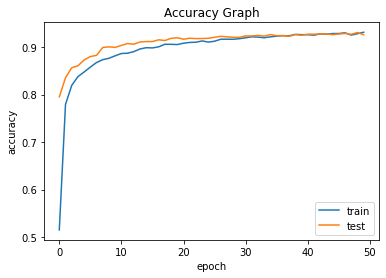

In [18]:
#Accuracy Graph
plt.plot(data.history['accuracy'])
plt.plot(data.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'bottom left')
plt.savefig('/content/Accuracy Graph')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


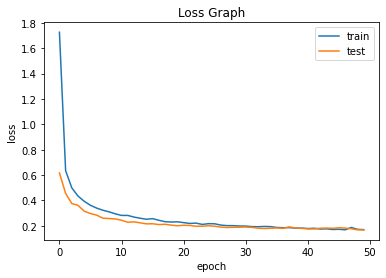

In [19]:
#Loss Graph
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'bottom left')
plt.savefig('/content/Loss Graph')

In [20]:
!wget "https://res.cloudinary.com/dovxlbprt/image/upload/v1554301451/sign_board.png"

--2021-01-01 10:44:19--  https://res.cloudinary.com/dovxlbprt/image/upload/v1554301451/sign_board.png
Resolving res.cloudinary.com (res.cloudinary.com)... 151.101.1.137, 151.101.65.137, 151.101.129.137, ...
Connecting to res.cloudinary.com (res.cloudinary.com)|151.101.1.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58638 (57K) [image/png]
Saving to: ‘sign_board.png’

sign_board.png      100%[===================>]  57.26K  --.-KB/s    in 0.008s  

2021-01-01 10:44:19 (7.14 MB/s) - ‘sign_board.png’ saved [58638/58638]



In [21]:
!mkdir -p final_char_images

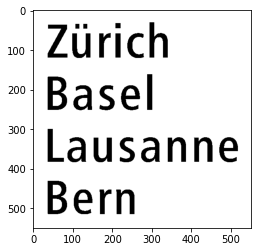

In [22]:
import matplotlib.pyplot as plt
img = cv2.imread("./sign_board.png")
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

offset = 50

first_half = grey_img[offset:-offset, offset:grey_img.shape[1]//2]
second_half = grey_img[offset:-offset, grey_img.shape[1]//2:-offset]

_, thresh_half1 = cv2.threshold(first_half, 200, 255, cv2.THRESH_BINARY_INV)
_, thresh_half2 = cv2.threshold(second_half, 200, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh_half1, cmap="gray")
plt.show()

In [23]:
 """

Now, the first image corresponds to the places with their names
So, I will extract the characters from that image by applying some operations related to contours

"""

'\n\nNow, the first image corresponds to the places with their names\nSo, I will extract the characters from that image by applying some operations related to contours\n\n'

In [24]:

contours, _ = cv2.findContours(thresh_half1.copy(), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
#### Sorting the contours on the basis of their areas
sorted_contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

### Finding the index of the contour from where non-english character contours start showing up
for i in range (len(sorted_contours)):
    if (cv2.contourArea(sorted_contours[i+1])<800 
        and (cv2.contourArea(sorted_contours[i])-cv2.contourArea(sorted_contours[i+1]) >= 300)):
        break

In [25]:
### Iterating throughout the sorted contours from the second contour to the i-th contour
### Ignored 1st contour - Because it corresponds to the whole window or bounding box of the image
### Ignored every contour after i-th index - Because it all the contours after that index correspond to non-english symbols


In [26]:
## Making a list (char_bases) of the positions of the base of each character (contour)
char_bases = []

for c in sorted_contours[1:i+1]:
    x, y, w, h = cv2.boundingRect(c)
    char_bases.append(y+h)


In [27]:
## Grouping the bases on the basis of alignment i.e. base pixels in same line will be grouped together in a sublist
char_bases = sorted(list(set(char_bases)))
# Garbage value addition - so that the last position doesn't get ignored
char_bases.append(999999)
char_grouped_bases = []
i=0
while i<len(char_bases)-1:
  group_base = []
  for j in range(i, len(char_bases)):
    if char_bases[j] - char_bases[i] > 3:
      break
    else:
      group_base.append(char_bases[j])
  char_grouped_bases.append(group_base)
  i = j
print(char_grouped_bases)

[[121, 122], [253, 254], [384, 385], [516]]


In [28]:
lined_contours = []
## Function for finding the horizontal position of the contour
## This function will be used to sort contours in a same line on the basis of their
## position because right now they are jumbled.
def x_cord_of_contour(contour):
    moment_mat = cv2.moments(contour)
    return int(moment_mat['m10']/moment_mat['m00'])

for group in char_grouped_bases:
  lined_ctr = []
  for base_pt in group:
    for c in contours:
      if (cv2.boundingRect(c)[1]+cv2.boundingRect(c)[3] == base_pt):
        lined_ctr.append(c)
  lined_ctr = sorted(lined_ctr, key=lambda x: x_cord_of_contour(x))
  lined_contours.append(lined_ctr)


In [29]:
## Saving the final images of each character (preprocessed) in the final_char_images folder
## Name of every character's saved image will look something like - <line1-char1.png>
for i in range(len(lined_contours)):
        for j in range(len(lined_contours[i])):
                c = lined_contours[i][j]
                x, y, w, h = cv2.boundingRect(c)
                char_img = thresh_half1[y:y+h, x:x+w]
                if w<100:
                        padding_width = (100-w)//2
                        padding_left = np.ones((h, padding_width), dtype=np.uint8)*255
                        padding_right = np.ones((h, padding_width), dtype=np.uint8)*255
                        half_padded_horizontal = np.concatenate((padding_left, char_img), axis=1)
                        full_padded_horizontal = np.concatenate((half_padded_horizontal, padding_right), axis=1)
                        char_img = full_padded_horizontal
                if h<100:
                        padding_height = (100-h)//2
                        padding_top = np.ones((padding_height, char_img.shape[1]), dtype=np.uint8)*255
                        padding_bottom = np.ones((padding_height, char_img.shape[1]), dtype=np.uint8)*255
                        half_padded_vertical = np.concatenate((padding_top, char_img), axis=0)
                        full_padded_vertical = np.concatenate((half_padded_vertical, padding_bottom), axis=0)
                        char_img = full_padded_vertical
                current_cropped_img = cv2.resize(char_img, (64, 64))
                cv2.imwrite("./final_char_images/line{}-char{}.png".format(i+1,j+1), current_cropped_img)
                cv2.rectangle(first_half, (x, y), (x + w, y + h), color=15*i, thickness=2)


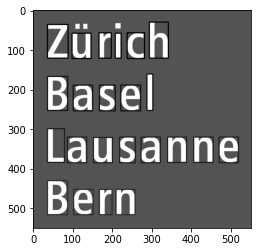

In [30]:
## Displaying the first half with contours highlighted
plt.imshow(first_half, cmap="gray")
plt.show()

In [31]:
!ls final_char_images

line1-char1.png  line2-char1.png  line3-char2.png  line3-char8.png
line1-char2.png  line2-char2.png  line3-char3.png  line4-char1.png
line1-char3.png  line2-char3.png  line3-char4.png  line4-char2.png
line1-char4.png  line2-char4.png  line3-char5.png  line4-char3.png
line1-char5.png  line2-char5.png  line3-char6.png  line4-char4.png
line1-char6.png  line3-char1.png  line3-char7.png


In [32]:
final_paths = glob.glob("./final_char_images/*.png")
print (final_paths)

['./final_char_images/line3-char6.png', './final_char_images/line1-char2.png', './final_char_images/line2-char3.png', './final_char_images/line3-char7.png', './final_char_images/line3-char3.png', './final_char_images/line4-char3.png', './final_char_images/line3-char8.png', './final_char_images/line1-char4.png', './final_char_images/line3-char4.png', './final_char_images/line3-char1.png', './final_char_images/line3-char5.png', './final_char_images/line2-char5.png', './final_char_images/line1-char5.png', './final_char_images/line2-char4.png', './final_char_images/line3-char2.png', './final_char_images/line1-char6.png', './final_char_images/line4-char1.png', './final_char_images/line2-char1.png', './final_char_images/line4-char4.png', './final_char_images/line4-char2.png', './final_char_images/line1-char1.png', './final_char_images/line2-char2.png', './final_char_images/line1-char3.png']


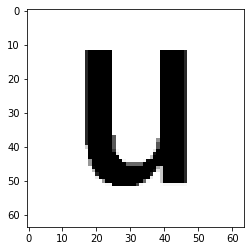

In [33]:
sample = cv2.imread("./final_char_images/line1-char2.png",0)
plt.imshow(sample, cmap="gray")
plt.show()

In [34]:
img = cv2.imread("./final_char_images/line1-char6.png", 0)
img = img.reshape(1, 64, 64, 1)
softmax_output = model.predict(img)
print ("Softmaxed output: {}".format(softmax_output))
output = np.where(softmax_output == softmax_output.max())
print ("Predicted class: {}".format(output[1][0]+1))

Softmaxed output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted class: 44


In [35]:
def class2char(class_num):
  class_num+=1
  if (class_num>10 and class_num<=36):
    return chr(class_num+54)
  elif (class_num>36 and class_num<=62):
    return chr(class_num+60)
  else:
    return chr(class_num+48)

In [36]:
final_paths = sorted(final_paths)
n_groups = int(final_paths[-1].split("line")[-1].split("-")[0])
grouped_final_chars = [[] for i in range(n_groups)]
  
for path in final_paths:
  group = int(path.split("line")[-1].split("-")[0])-1                   
  char = cv2.imread(path, 0)
  char = char.reshape(1, 64, 64, 1)
  softmax_output = model.predict(char)
  output = np.where(softmax_output == softmax_output.max())
  grouped_final_chars[group].append(class2char(output[-1][0]))
  
print (grouped_final_chars)


[['Z', 'u', 'r', 'l', 'C', 'h'], ['B', 'a', 'S', 'e', 'm'], ['L', 'a', 'u', 'S', 'a', 'n', 'n', 'e'], ['B', 'e', 'r', 'n']]


In [47]:
places = ["".join(x).capitalize() for x in grouped_final_chars]

In [48]:
places

['Zurlch', 'Basem', 'Lausanne', 'Bern']

In [41]:
import requests
import json

"""
   Sample article object:


       {
           "source": {
               "id": "the-jerusalem-post",
               "name": "The Jerusalem Post"
           },
           "author": "By ANNA AHRONHEIM",
           "title": "The Day after Daesh",
           "description": "Some description.",
           "url": "https://www.jpost.com/Middle-East/The-Day-after-Daesh-581005",
           "urlToImage": "https://images.jpost.com/image/upload/f_auto,fl_lossy/t_Article2016_ControlFaceDetect/426563",
           "publishedAt": "2020-05-18T12:37:02Z",
           "content": "Some content"
       }

   """


def fetch_news(place, api_key="d24740a4747e4c13bd4fe519fe659185"):
    url = "https://newsapi.org/v2/everything?q={}&from=2020-12-02&sortBy=publishedAt&apiKey={}".format(place, api_key)
    client = requests.get(url)
    output = json.loads(client.text)
    output = output["articles"]
    for out in output:
      print ("\n\nTitle: {}\n".format(out["title"]))
      #print("Author: " + out["author"] + "\n")
      print("Content: {}\n".format(out["content"]))
      print("Description: {}\n".format(out["description"]))
      print("Published On: {}\n".format(out["publishedAt"].split("T")))


In [42]:
news = [fetch_news("Zurich") ]



Title: Noida in 2020: Biggest airport, film city and new police system

Content: Development work on India's biggest airport and a new film city made sure Gautam Buddh Nagar district in Uttar Pradesh stayed in the limelight in a year headlined by a pandemic and lockdown.
Chief M… [+5806 chars]

Description: Development work on India's biggest airport and a new film city made sure Gautam Buddh Nagar district in Uttar Pradesh stayed in the limelight

Published On: ['2021-01-01', '09:34:00Z']



Title: Noida 2020: India's biggest airport, film city and new police system

Content: Noida (UP): Development work on India's biggest airport and a new film city made sure Gautam Buddh Nagar district in Uttar Pradesh stayed in the limelight in a year headlined by a pandemic and lockdo… [+5683 chars]

Description: The Noida International Airport, which had got an in-principle approval of the Centre in 2018, only got its official name, logo and key agreement signed in 2020 that allows Swiss firm Z

In [49]:
from collections import defaultdict

news = defaultdict(list)


for place in places:
    
    try:
      news[place].append(fetch_news(place))
    except:
      print(place,": Error")



Title: Powrot "Ala nie wali mu paly"

Content: Drogi Wykopowiczu
w zaczonym linku do Polityki Prywatnoci przypominamy podstawowe informacje z zakresu przetwarzania danych osobowych dostarczanych przez Ciebie podczas korzystania z naszego serwisu… [+108 chars]

Description: W radiu w te wakacje byl remix Robin Schulza Wes Alane. Jak lecialo to w RMF to slychac bylo Ala Nie wali mu paly mlody sam wie normalnie. W Esce zreszto tez to lecialo to. Tekst identyczny w tym tylko jest melodia unowoczesniona z basem.

Published On: ['2020-12-31', '00:04:51Z']



Title: Asus UX371E Zenbook Flip S – Tiger Lake dla fotografów i nie tylko (recenzja)

Content: Mae, lekkie ultrabooki to moja ulubiona kategoria sprztu mobilnego – poza smartfonami. Oferuj niez moc obliczeniow przy rozsdnym czasie pracy na akumulatorze i maj przewag nad tabletami, umoliwiajc u… [+15652 chars]

Description: Małe, lekkie ultrabooki to moja ulubiona kategoria sprzętu mobilnego – poza smartfonami. Oferują niezłą moc oblicz